In [1]:
import numpy as np
import numpy.linalg as LA
import jax
import jax.numpy as jnp
import jax.numpy.linalg as JLA

import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
from jax.example_libraries import optimizers
from tqdm.notebook import trange
from functools import partial

In [3]:
delta = 0.05
beta = 20.0
N = 100
T = 1.0
Lambda = 1000.0
train_itr = 300

In [8]:
def rbf(x, beta):
    return jnp.exp(-beta*x**2)
d_rbf = jax.grad(rbf)

In [23]:
def rbf_func(x, theta):
    s = 0.
    for i in range(len(theta)):
        s +=theta[i] * rbf(x - delta*(i-1)+0.5, beta)
    return s

In [24]:
def d_rbf_func(x, theta):
    s = 0.
    for i in range(len(theta)):
        s += theta[i] * d_rbf(x - delta*(i-1)+0.5, beta)
    return s

In [25]:
theta = jnp.ones(50)
xs = jnp.arange(0,1,1/50)

In [31]:
df = pd.DataFrame()
df["x"] = xs
df["rbf_func"] = [float(rbf_func(x, theta)) for x in xs]
df["d_rbf_func"] = [float(d_rbf_func(x, theta)) for x in xs]

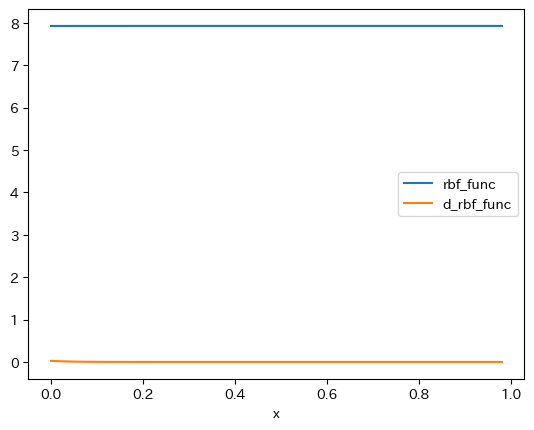

In [38]:
df.plot("x", ["rbf_func","d_rbf_func"]);